## Day 1 — Setup & Imports

### Quick note on θ (theta)
- **θ** just means the parameters of the line we’re learning.
- For simple linear regression: **θ₀** is the intercept (where the line crosses y‑axis) and **θ₁** is the slope.
- We tweak θ to make predictions line up with the data (by minimising the cost).

# Linear Regression (from scratch)
Goal: implement linear regression from scratch with NumPy.
Steps: derive gradients, implement training loop, plot loss.

Following Andrew Ng ML Course - Week 1

## Day 2 — Generate & Visualise a Synthetic Linear Dataset

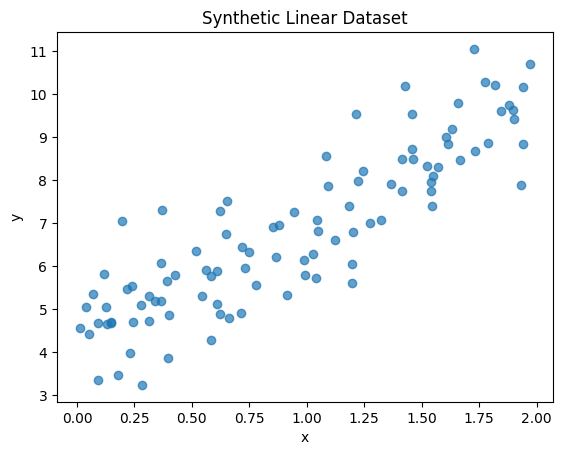

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # keep results reproducible each run

# Fake (but realistic) linear data:
# x values live roughly in [0, 2]
X = 2 * np.random.rand(100, 1)

# The underlying rule I used to generate targets:
# y = 4 + 3x + ε, where ε is small Gaussian (normal) noise ~ N(0, 1)
# Noise makes points look like real measurements (never perfectly on the line).
y = 4 + 3 * X + np.random.randn(100, 1)

# Visual check: should look like a fuzzy line with positive slope
plt.scatter(X, y, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Dataset")
plt.show()


## Days 3 to 5 — Cost Function & Gradient Descent

**Goal today**
- Define hypothesis and **cost function** \(J(\theta)\)
- Implement **gradient descent**
- Train on synthetic data and **watch the cost decrease**


In [16]:
# Prepare design matrix with bias term (1s column)
try:
    X  # reuse from Day 2 if present
    y
except NameError:
    # Fallback: generate the same synthetic dataset if notebook was restarted
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

import numpy as np

m = len(y)
X_b = np.c_[np.ones((m, 1)), X]  # shape (m, 2): [1, x]
print("X_b shape:", X_b.shape)

X_b shape: (100, 2)


In [17]:
def compute_cost(X, y, theta):
    """Mean Squared Error (MSE) cost for linear regression.
    X: (m, n) design matrix. Column 0 should be all 1s (the bias term).
    y: (m, 1) targets
    theta: (n, 1) parameters we’re learning (θ₀=intercept, θ₁…=slopes)
    """
    m = len(y)
    preds = X.dot(theta)               # model predictions h_θ(x)
    errors = preds - y                 # residuals (how far off we are)
    J = (1 / (2 * m)) * np.sum(errors ** 2)  # the classic MSE / 2
    return J

# Sanity check at θ = 0 (usually large, since the line is at y=0)
try:
    X_b
except NameError:
    # if we ran this cell in isolation, rebuild design matrix quickly
    import numpy as np
    X_b = np.c_[np.ones((len(X), 1)), X]
theta_zeros = np.zeros((X_b.shape[1], 1))
compute_cost(X_b, y, theta_zeros)


np.float64(25.00415182181856)

In [18]:
def gradient_descent(X, y, theta, alpha=0.1, num_iters=1000):
    """Batch gradient descent.
    alpha: learning rate (how big a step we take each update)
    num_iters: number of parameter updates
    Returns: (theta, cost_history)
    """
    m = len(y)
    J_hist = []

    for _ in range(num_iters):
        preds = X.dot(theta)
        errors = preds - y
        # gradient of MSE wrt theta: (1/m) * X^T * (preds - y)
        grads = (1 / m) * X.T.dot(errors)
        theta = theta - alpha * grads   # take a step downhill
        J_hist.append(compute_cost(X, y, theta))

    return theta, J_hist

# Train from a simple starting point θ = 0
theta_init = np.zeros((X_b.shape[1], 1))
theta_final, J_hist = gradient_descent(X_b, y, theta_init, alpha=0.1, num_iters=1000)
theta_final.ravel()  # expect ~ [intercept≈4, slope≈3]


array([4.21509612, 2.77011342])

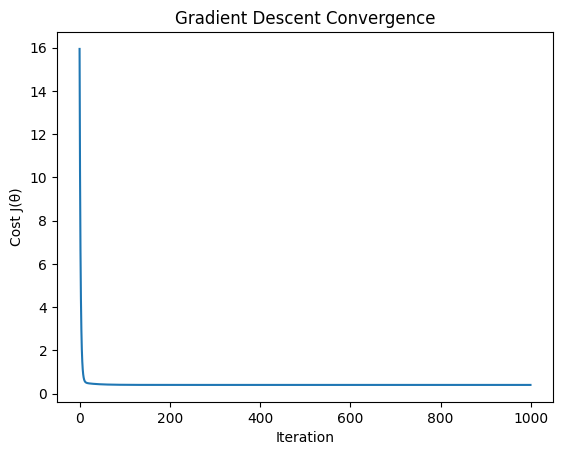

In [19]:
# Cost should steadily decrease if learning rate is sensible
import matplotlib.pyplot as plt

plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Gradient Descent Convergence")
plt.show()


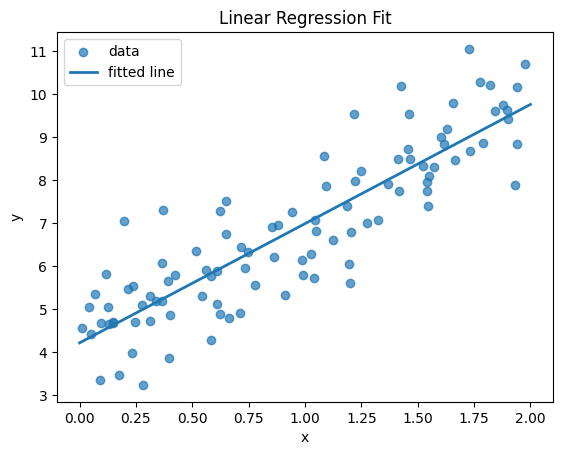

In [20]:
# Draw the learned line on top of the data to eyeball the fit
import numpy as np
import matplotlib.pyplot as plt

x_line = np.array([[0.0], [2.0]])           # span of our X range
X_line_b = np.c_[np.ones((2, 1)), x_line]   # add bias column
y_line = X_line_b.dot(theta_final)          # model’s prediction

plt.scatter(X, y, alpha=0.7, label="data")
plt.plot(x_line, y_line, label="fitted line", linewidth=2)
plt.xlabel("x"); plt.ylabel("y"); plt.title("Linear Regression Fit")
plt.legend()
plt.show()


## Week 1 — Complete

In [22]:
# Compare solutions: Normal Equation vs Gradient Descent
import numpy as np

# Make sure X and y exist (regenerate the same distribution if the kernel was restarted)
try:
    X, y
except NameError:
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

# Design matrix with bias term
X_b = np.c_[np.ones((len(X), 1)), X]

# 1) Normal Equation (closed-form solution)
theta_normal = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)

# 2) Gradient Descent (reuse if available; otherwise run a quick pass)
try:
    theta_final
    theta_gd = theta_final
except NameError:
    def compute_cost(X, y, theta):
        m = len(y)
        preds = X.dot(theta)
        errors = preds - y
        return (1/(2*m)) * np.sum(errors**2)

    def gradient_descent(X, y, theta, alpha=0.1, num_iters=1000):
        m = len(y); J_hist = []
        for _ in range(num_iters):
            preds = X.dot(theta)
            errors = preds - y
            grads = (1/m) * X.T.dot(errors)
            theta = theta - alpha * grads
            J_hist.append(compute_cost(X, y, theta))
        return theta, J_hist

    theta_init = np.zeros((X_b.shape[1], 1))
    theta_gd, _ = gradient_descent(X_b, y, theta_init, alpha=0.1, num_iters=1000)

# Print out the learned parameters (θ) from both methods to compare results
# θ (theta) represents the model parameters: θ₀ is the intercept, θ₁ is the slope

print("θ (Normal Equation):", theta_normal.ravel())  # Direct solution from the math formula
print("θ (Gradient Descent):", theta_gd.ravel())     # Learned by iteratively adjusting θ to reduce error

# Compare how close both sets of θ values are (L2 norm = overall distance between them)
print("Δθ (L2 norm):", np.linalg.norm(theta_normal - theta_gd))



θ (Normal Equation): [4.21509616 2.77011339]
θ (Gradient Descent): [4.21509612 2.77011342]
Δθ (L2 norm): 4.8850692143838383e-08


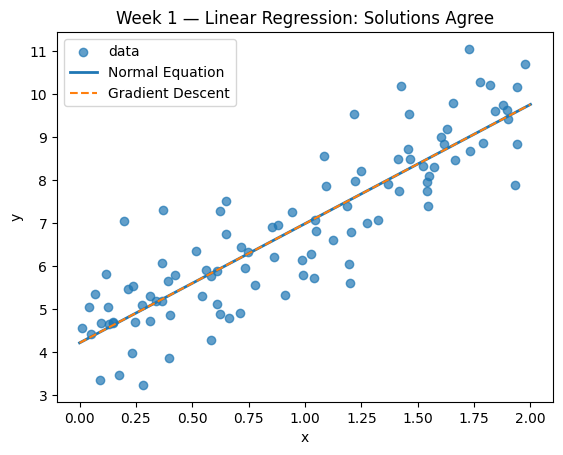

In [23]:
# Overlay predictions from both methods
import numpy as np
import matplotlib.pyplot as plt

x_line = np.array([[0.0], [2.0]])
X_line_b = np.c_[np.ones((2, 1)), x_line]

y_pred_normal = X_line_b @ theta_normal
y_pred_gd = X_line_b @ theta_gd

plt.scatter(X, y, alpha=0.7, label="data")
plt.plot(x_line, y_pred_normal, label="Normal Equation", linewidth=2)
plt.plot(x_line, y_pred_gd, linestyle="--", label="Gradient Descent")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Week 1 — Linear Regression: Solutions Agree")
plt.legend()
plt.show()


### Reflection (Week 1)
- Both methods learn similar parameters (**θ₀ ≈ intercept**, **θ₁ ≈ slope**).  
- **Normal Equation** gives a direct solution (fast for small features), while **Gradient Descent** scales to big feature sets and generalises to other models.  
- Adding **Gaussian noise** made the dataset realistic — the fitted line captures the trend, not every point.  
- Intuition locked in: we tweak **θ** to **minimise cost (MSE)** so predictions match data better over time.
